In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_2.csv' , nrows=50000)

In [3]:
df.shape

(50000, 109)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_test, y_train ,y_test = train_test_split( df.drop(labels = ['target'],axis=1),
    df['target'],test_size=0.33, random_state =0)

In [6]:
x_train.shape , x_test.shape

((33500, 108), (16500, 108))

<AxesSubplot:>

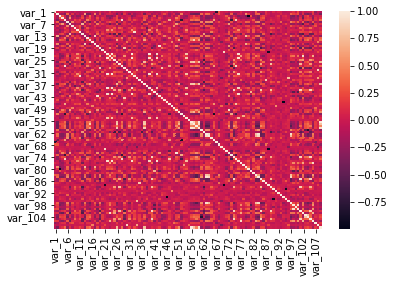

In [7]:
sns.heatmap(x_train.corr(method = 'pearson'))

<AxesSubplot:>

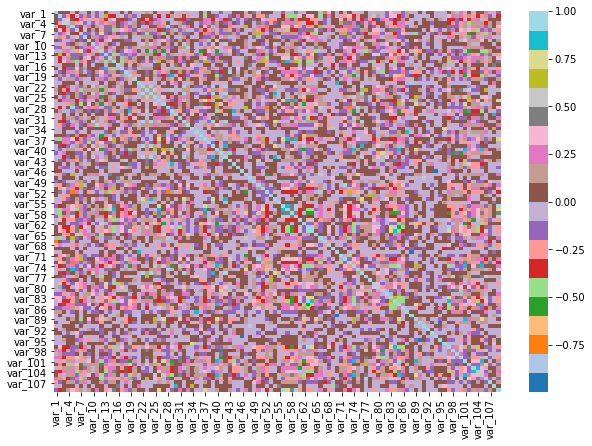

In [8]:
plt.figure(figsize = (10,7))
a = x_train.corr(method = 'pearson')
cmap = 'tab20'
sns.heatmap(a,cmap = cmap)

In [9]:
c = 0

for i in a.loc['var_40']:
    if i > 0.8:
        print(a.columns[c] , i)
    c = c + 1

var_40 1.0
var_74 0.8832094361250771
var_85 0.833520317387537
var_101 0.8843743898920425
var_105 0.8693480509224999


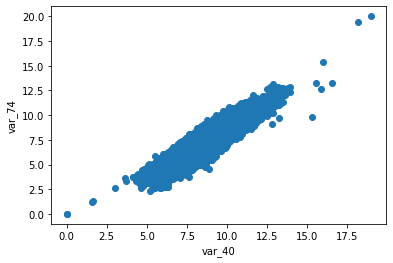

In [10]:
plt.scatter(x_train['var_40'],x_train['var_74'])
plt.ylabel('var_74')
plt.xlabel('var_40')
plt.show()

## Brute Force Approach

In [11]:
def corre(df,threshold):
    col_corr = set()
    sol = df.corr()
    for i in range(len(sol.columns)):
        for j in range(i):
            if abs(sol.iloc[i,j]) > threshold:
                print((abs(sol.iloc[i,j])),sol.columns[i],sol.columns[j])
    return col_corr

In [12]:
def corre(df , threshold):
    col_corr = set()
    
    sol = df.corr()
    
    for i in range(len(sol.columns)):
        for j in range(i):
            if abs(sol.iloc[i,j]) > threshold:
                print((abs(sol.iloc[i,j]), sol.columns[i] , sol.columns[j]))
                col = sol.columns[j]
                col_corr.add(col)
    return col_corr

In [13]:
k = corre(x_train,0.8)
len(k)

(0.8626052469342241, 'var_17', 'var_13')
(0.981452906261503, 'var_24', 'var_22')
(0.953697982418754, 'var_28', 'var_5')
(0.833841463733337, 'var_29', 'var_19')
(0.9905211735807389, 'var_32', 'var_22')
(0.9805789108657662, 'var_32', 'var_24')
(0.9457463056352233, 'var_33', 'var_11')
(0.9746438533238448, 'var_39', 'var_22')
(0.9434232773971213, 'var_39', 'var_24')
(0.9750483026723724, 'var_39', 'var_32')
(0.9195345609200758, 'var_42', 'var_22')
(0.9674975472797267, 'var_42', 'var_24')
(0.9204101830556399, 'var_42', 'var_32')
(0.8574576428961398, 'var_42', 'var_39')
(0.9656493720963767, 'var_43', 'var_18')
(0.8367226530526484, 'var_44', 'var_29')
(0.8147662281830337, 'var_54', 'var_24')
(0.8283928137946812, 'var_54', 'var_42')
(0.8368801266779963, 'var_57', 'var_15')
(0.8313756396053151, 'var_57', 'var_26')
(0.8211516387221621, 'var_57', 'var_37')
(0.8443707401627597, 'var_57', 'var_56')
(0.8124795215256744, 'var_59', 'var_26')
(0.8308924095953021, 'var_59', 'var_37')
(0.9758604064857155,

40

In [14]:
x_train.drop(labels = k , axis = 1 ,inplace=True)

In [15]:
x_train.shape

(33500, 68)